# Постановка задачи оптимального управления

$\dot{x} = f(x,u,t), \qquad  x \in \mathbb{R}^n, \qquad  u \in \mathbb{U}^m$

$x$ - вектор фазовых переменных, $u$ - вектор управляющих параметров.

Начальные и терминальные условия условия:

$$x(t_0) \in A = \left\{
    \begin{array}\\
       a_1(x,t) = 0 \\
        \dots \\
        a_l(x,t) = 0
    \end{array}   
\right. \qquad
x(t_f) \in B = \left\{
    \begin{array}\\
       b_1(x,t) = 0 \\
        \dots \\
        b_r(x,t) = 0
    \end{array}   
\right.$$


Функционал
$$\int_{t_0}^{t_f}I(x,u,t)dt + \Phi(x(t_f), t_f) \rightarrow \max_u$$

# Уравнение Беллмана

Пусть  поставленная задача оптимального управления имеет решение. Максимальное значение функционала для начального состояния $x, t$:
$$J^* = V(x,t)$$

Будем называть $V(x,t)$ функцией оптимального поведения, опорной функцией или функцией Беллмана.



В теории управления доказывается, что она определяется как решение следующего уравнения (Беллмана) с условием  на конечное состояние $V(x(t_f),t_f) = \Phi(x(t_f), t_f)$.
$$\frac{\partial V}{\partial t} + \max_{u(t)} \left[ I(x,u,t) + \frac{\partial V}{\partial x} \cdot f(x,u,t)\right]= 0$$

Существование опорной функции является достаточным условием возможности построить для нашей задачи оптимальное управление.

# Задача


Пусть дана следующая система
$$\left\{
\begin{array}\\
\dot{x} = v \\
\dot{v} = u \\
\ |u| <= 1
\end{array}
\right.$$

В качестве функционала предлагается рассмотреть время за которое система достигнет нуля
$$- \int_{0}^{t_f} dt = -{t_f}\rightarrow \max_u $$

Граничные условия задачи:
$$x(t_0) = x_0 \qquad v(t_0) = v_0 $$

Конечный момент времени не фиксирован. 

Заметим, что наша опорная функция не зависит от времени. Тогда уравнение Беллмана запишется в виде:
$$\max_{u(t)}\left[-1 + \frac{\partial V}{\partial x}\cdot v +  \frac{\partial V}{\partial v}\cdot u\right] = 0 $$

или
$$-1 + \frac{\partial V}{\partial x}\cdot v +\max_{u(t)}\left[  \frac{\partial V}{\partial v}\cdot u\right] = 0 $$

Максимум достигается когда управление максимально по абсолютной величине и компенсирует знак производной:
$$-1 + \frac{\partial V}{\partial x}\cdot v +\left|  \frac{\partial V}{\partial v} \right| = 0 $$

Сразу можем определить оптимальное управление для задачи:
$$ u = sign(\frac{\partial V}{\partial v}) $$

Далее решим уравнение Беллмана.

In [103]:
from sympy import Function, Derivative, Eq, Abs
from sympy.solvers.pde import pdsolve, classify_pde
from sympy.abc import x, v
f = Function("V")(x, v)
fx = Derivative(f, x)
fy = Derivative(f, v)
eq = Eq(fx * v + fy - 1, 0)
pdsolve(eq)

Eq(V(x, v), -sqrt(v**2) + F(v**2 - 2*x))

Действительно, рассмотрим, например
$$V(x, v) = v + F(v^2 - 2x) $$
$$\frac{\partial V}{\partial x} = -2\cdot F' $$
$$\frac{\partial V}{\partial v} = 1 + 2\cdot v \cdot F' $$
Тогда уравнение
$$-1 -2\cdot F'\cdot v +\left|1 + 2\cdot v \cdot F' \right| = 0 $$
или
$$\left|1 + 2\cdot v \cdot F' \right| = 1 + 2\cdot v\cdot F'  $$

Видно, что последнее равенство определяет область применения рассмотренной функции V. Выбирая вид функции F, лишь бы была дифференцируема, построим фунцкцию Беллмана на соответсвующих участках плоскости.
$$ V_1  = -v - 2 \sqrt{x + v^2/2},  \qquad при  x \geq -v\cdot |v| / 2$$
$$ V_2  = v - 2 \sqrt{-x + v^2/2},  \qquad при  x \leq -v\cdot |v| / 2$$

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import sqrt, copysign
import sys

In [105]:
# определяем функцию Беллмана и её производную по v (он же y)
def v1(x, y):
    return -y - 2 * sqrt(x + y ** 2 / 2)

def v2(x, y):
    return y - 2 * sqrt(-x + y ** 2 / 2)

def v(x, y):
    if x >= -y * abs(y) / 2:
        return v1(x, y)
    elif x < -y * abs(y) / 2:
        return v2(x, y)
    else:
        sys.exit('error in v')
        
        
def v1_y(x, y):
    if x == 0 and y == 0:
        return -1
    return -1 - y / sqrt(x + y ** 2 / 2)

def v2_y(x, y):
    if x == 0 and y == 0:
        return 1
    return 1 - y / sqrt(-x + y ** 2 / 2)

def v_y(x, y):
    if x >= -y * abs(y) / 2:
        return v1_y(x, y)
    elif x < -y * abs(y) / 2:
        return v2_y(x, y)
    else:
        sys.exit('error in v_y')  

In [108]:
# у меня возникли сложности с scipy.solve_ivp поэтому применил метод Рунге-Кутты 4 порядка, надеюсь, не критично
def u(x, y):
    return copysign(1, v_y(x, y))

def ode(t, x):
    return np.array([x[1], u(x[0], x[1])])

def rk_4(t, y, step, func):
    k_1 = func(t, y)
    k_2 = func(t + step / 2, y + step * k_1 / 2)
    k_3 = func(t + step / 2, y + step * k_2 / 2)
    k_4 = func(t + step, y + step * k_3)
    return y + step / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

def calc(y_0, step, goal, rk, func):
    cur_t = 0
    cur_y = y_0
    solution = [cur_y]
    times_res = [cur_t]
    tol = 0.01
    while abs(cur_y[0]) > goal + tol or abs(cur_y[1]) > goal + tol:
        cur_y = rk(cur_t, cur_y, step, func)
        cur_t += step
        times_res.append(cur_t)
        solution.append(cur_y)
    return np.array(times_res), np.array(solution)

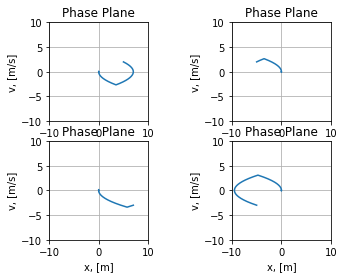

In [130]:
step = 0.01
goal = 0

# начальная координата и скорость
x_01 = np.array([5, 2])

times1, x1 = calc(x_01, step, goal, rk_4, ode)

fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax1.plot(x1[:, 0], x1[:, 1])
ax1.grid(True)
ax1.set_title('Phase Plane')
ax1.set_ylabel(r'v, [m/s]')
ax1.set_xlabel(r'x, [m]')
ax1.set_aspect('equal')

# начальная координата и скорость
x_02 = np.array([-5, 2])

times2, x2 = calc(x_02, step, goal, rk_4, ode)


ax2 = fig.add_subplot(222)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax2.plot(x2[:, 0], x2[:, 1])
ax2.grid(True)
ax2.set_title('Phase Plane')
ax2.set_ylabel(r'v, [m/s]')
ax2.set_xlabel(r'x, [m]')
ax2.set_aspect('equal')


# начальная координата и скорость
x_03 = np.array([7, -3])

times3, x3 = calc(x_03, step, goal, rk_4, ode)


ax3 = fig.add_subplot(223)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax3.plot(x3[:, 0], x3[:, 1])
ax3.grid(True)
ax3.set_title('Phase Plane')
ax3.set_ylabel(r'v, [m/s]')
ax3.set_xlabel(r'x, [m]')
ax3.set_aspect('equal')



# начальная координата и скорость
x_04 = np.array([-5, -3])

times4, x4 = calc(x_04, step, goal, rk_4, ode)


ax4 = fig.add_subplot(224)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax4.plot(x4[:, 0], x4[:, 1])
ax4.grid(True)
ax4.set_title('Phase Plane')
ax4.set_ylabel(r'v, [m/s]')
ax4.set_xlabel(r'x, [m]')
ax4.set_aspect('equal')
# здесь нельзя не отметить, что полученное решение, качественно повторяет геометрическое решение данной задачи, когда по
# двум параболам мы приходим в ноль